In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C://Users\Manish sharma\Downloads\household_power_consumption")
print (os.getcwd())

C:\Users\Manish sharma\Downloads\household_power_consumption


In [2]:
df=pd.read_csv('household_power_consumption.txt',sep=';',parse_dates={'datentime':['Date','Time']},low_memory=False,infer_datetime_format=True
              ,index_col='datentime')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datentime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datentime,,,,,,,
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [6]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Checking out null values. Here null values are represented by '?' and 'nan' .I conveerted them into np.nan

In [7]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
df=df.replace('?',np.nan)
df=df.replace('nan',np.nan)
missing_df=df.isnull().sum().sort_values(ascending=False)
train_missing=pd.DataFrame(missing_df).reset_index()
train_missing.columns=["features","Number of NAs"]
train_missing.head(8)

,features,Number of NAs
0,Sub_metering_3,25979
1,Sub_metering_2,25979
2,Sub_metering_1,25979
3,Global_intensity,25979
4,Voltage,25979
5,Global_reactive_power,25979
6,Global_active_power,25979


In [9]:
from sklearn.preprocessing import Imputer
mean_imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)


df['Sub_metering_3'] = mean_imp.fit_transform(df[['Sub_metering_3']]).ravel()
df['Sub_metering_2'] = mean_imp.fit_transform(df[['Sub_metering_2']]).ravel()
df['Sub_metering_1'] = mean_imp.fit_transform(df[['Sub_metering_1']]).ravel()
df['Global_intensity'] = mean_imp.fit_transform(df[['Global_intensity']]).ravel()
df['Global_reactive_power'] = mean_imp.fit_transform(df[['Global_reactive_power']]).ravel()
df['Voltage'] = mean_imp.fit_transform(df[['Voltage']]).ravel()
df['Global_active_power'] = mean_imp.fit_transform(df[['Global_active_power']]).ravel()

C:\Users\Manish sharma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


    Visualiztion

Ploting Sum of Global_active_power resampled over day

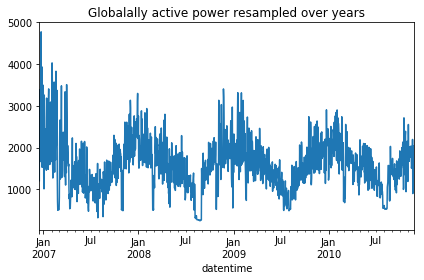

In [12]:
df['Global_active_power'].resample('D').sum().plot(title='Globalally active power resampled over years')
plt.tight_layout()
plt.show() 

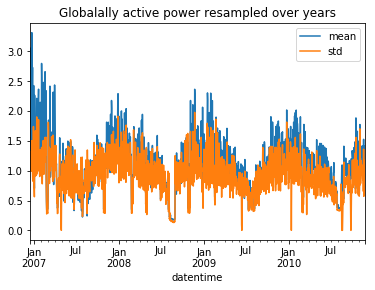

In [13]:
#here ploted average and standard deviation of Global_active_power resampled over day
h=df['Global_active_power'].resample('D').agg(['mean','std']).plot(title='Globalally active power resampled over years')
plt.show() 

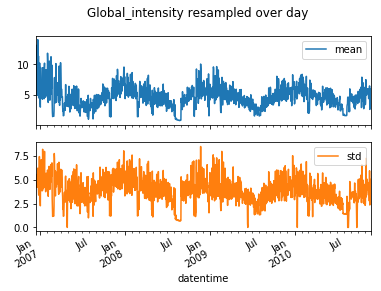

In [14]:
# Here ploted mean and standard deviation of global_intensity resampled over day
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

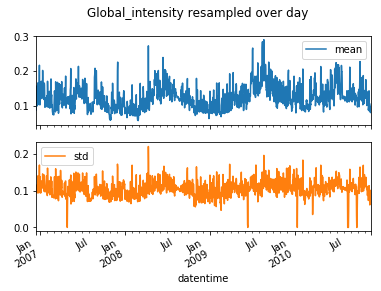

In [15]:
# Here ploted mean and standard deviation of global_reactive_power resampled over day
p = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
p.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

<Figure size 1332x756 with 0 Axes>

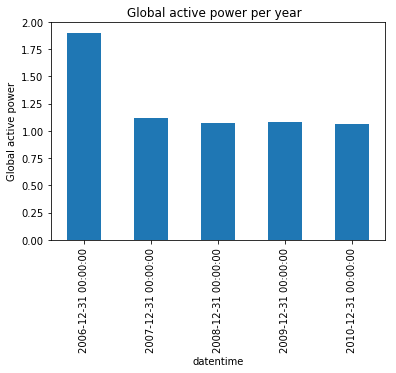

<Figure size 1332x756 with 0 Axes>

In [16]:
##here ploted average  deviation of Global_active_power resampled over Year
p1=df['Global_active_power'].resample('Y').mean().plot(kind='bar')  
plt.ylabel("Global active power")
plt.title("Global active power per year  ")
plt.figure(figsize=(18.5, 10.5))

<Figure size 1332x756 with 0 Axes>

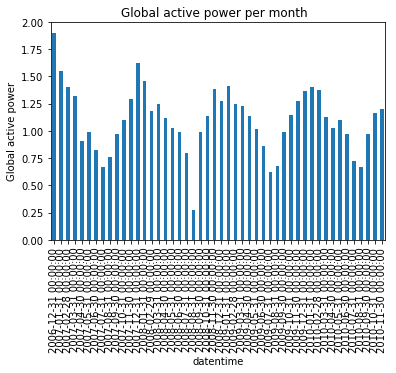

<Figure size 1332x756 with 0 Axes>

In [17]:
##here ploted average  deviation of Global_active_power resampled over Month
from matplotlib.pyplot import figure
p1=df['Global_active_power'].resample('M').mean().plot(kind='bar')  

plt.ylabel("Global active power")
plt.title("Global active power per month  ")
plt.figure(figsize=(18.5, 10.5))

<Figure size 1332x756 with 0 Axes>

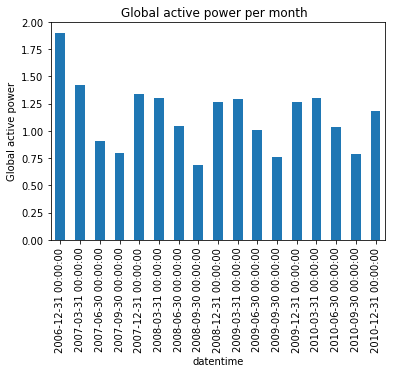

<Figure size 1332x756 with 0 Axes>

In [18]:
##here ploted average  deviation of Global_active_power resampled over Quarterly
p1=df['Global_active_power'].resample('Q').mean().plot(kind='bar')  
plt.ylabel("Global active power")
plt.title("Global active power per month  ")
plt.figure(figsize=(18.5, 10.5))

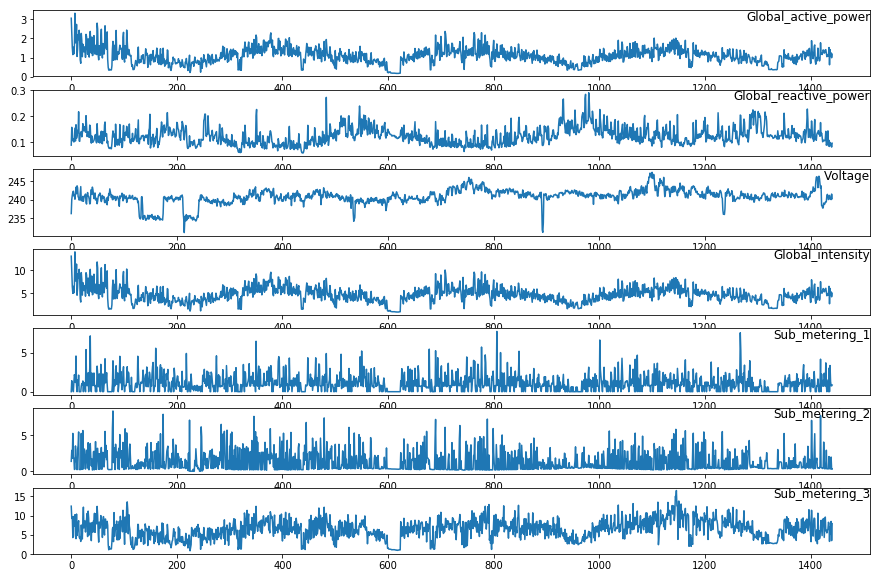

In [19]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
column=[0,1,2,3,4,5,6]
values=df.resample('D').mean().values
i=1
plt.figure(figsize=(15, 10))
for group in column:
    plt.subplot(len(column),1,i)
    plt.plot(values[:,group])
    plt.title(df.columns[group],y=0.76,loc='right')
    i += 1
plt.show()


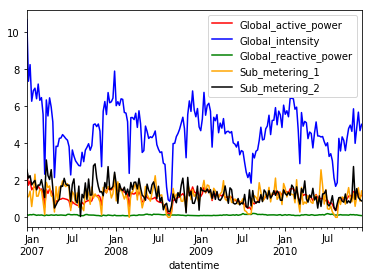

In [20]:
#resampling features over week and computing mean
df.Global_active_power.resample('W').mean().plot(color='red',legend=True)
df.Global_intensity.resample('W').mean().plot(color='blue',legend=True)
df.Global_reactive_power.resample('W').mean().plot(color='green',legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='orange',legend=True)
df.Sub_metering_2.resample('W').mean().plot(color='black',legend=True)
plt.show()

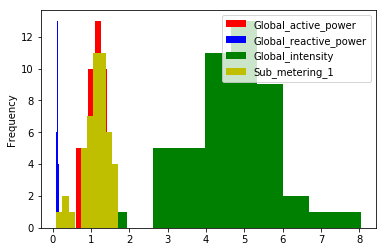

In [21]:
#resampling features over Month and computing mean
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

<h1> Checking Correlation between features </h1>

In [22]:
np.corrcoef(df.Global_active_power,df.Global_intensity)

array([[1.       , 0.9988886],
       [0.9988886, 1.       ]])

In [23]:
np.corrcoef(df.Global_active_power,df.Global_reactive_power)

array([[1.        , 0.24701705],
       [0.24701705, 1.        ]])

In [24]:
np.corrcoef(df.Global_active_power,df.Voltage)

array([[ 1.        , -0.39976161],
       [-0.39976161,  1.        ]])

In [25]:
np.corrcoef(df.Global_intensity,df.Voltage)

array([[ 1.        , -0.41136307],
       [-0.41136307,  1.        ]])

In [26]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1,-0.112246,0.26612,0.123111,0.139231,0.0896165
Voltage,-0.399762,-0.112246,1,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.26612,-0.411363,1,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1,0.0547209,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.0547209,1,0.080872
Sub_metering_3,0.638555,0.0896165,-0.268172,0.626543,0.102571,0.080872,1


In [27]:
corr = df.resample('M').mean().corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1,-0.534086,0.490339,0.998046,0.584021,0.595636,0.715697
Global_reactive_power,-0.534086,1,-0.0846722,-0.529418,-0.182588,-0.342054,-0.199522
Voltage,0.490339,-0.0846722,1,0.465805,0.113656,-0.0724056,0.637972
Global_intensity,0.998046,-0.529418,0.465805,1,0.599001,0.618432,0.698654
Sub_metering_1,0.584021,-0.182588,0.113656,0.599001,1,0.556774,0.443118
Sub_metering_2,0.595636,-0.342054,-0.0724056,0.618432,0.556774,1,0.233283
Sub_metering_3,0.715697,-0.199522,0.637972,0.698654,0.443118,0.233283,1


In [28]:
corr = df.resample('Y').mean().corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1,0.5,-0.3,1,1,0.9,0.1
Global_reactive_power,0.5,1,0.6,0.5,0.5,0.2,0.8
Voltage,-0.3,0.6,1,-0.3,-0.3,-0.6,0.6
Global_intensity,1,0.5,-0.3,1,1,0.9,0.1
Sub_metering_1,1,0.5,-0.3,1,1,0.9,0.1
Sub_metering_2,0.9,0.2,-0.6,0.9,0.9,1,0
Sub_metering_3,0.1,0.8,0.6,0.1,0.1,0,1


<h3>  I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step </h3>

In [29]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [30]:
## full data without resampling
from sklearn.preprocessing import MinMaxScaler
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.374796   0.300719   0.376090   0.377593        0.0     0.0125   
2   0.478363   0.313669   0.336995   0.473029        0.0     0.0125   
3   0.479631   0.358273   0.326010   0.473029        0.0     0.0250   
4   0.480898   0.361151   0.340549   0.473029        0.0     0.0125   
5   0.325005   0.379856   0.403231   0.323651        0.0     0.0125   

   var7(t-1)   var1(t)  
1   0.548387  0.478363  
2   0.516129  0.479631  
3   0.548387  0.480898  
4   0.548387  0.325005  
5   0.548387  0.311787  


In [31]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 7) (8760,) (2066498, 1, 7) (2066498,)


<h1> I'll be using Long Short term Memory(LSTM)  to predict Global_active_power

In [32]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation, LSTM
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [33]:
# Build Simple RNN
# Initialize the model
model = Sequential()
# add input layer
model.add(keras.layers.InputLayer(input_shape=(train_X.shape[1], train_X.shape[2])))
# add RNN layer
model.add(LSTM(units=10, activation=None, use_bias=False,
                    kernel_initializer='glorot_uniform',
                    recurrent_initializer='orthogonal', bias_initializer='zeros', 
                    kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None,
                    activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
                    bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                    return_sequences=False, return_state=False, go_backwards=False, 
                    stateful=False, unroll=False))
# add output layer
model.add(Dense(1))

W1115 18:01:21.185816 26696 deprecation_wrapper.py:119] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1115 18:01:21.399855 26696 deprecation_wrapper.py:119] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1115 18:01:21.480116 26696 deprecation_wrapper.py:119] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [34]:
from keras.optimizers import RMSprop
opt = RMSprop()
model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mae'])

W1115 18:01:21.719920 26696 deprecation_wrapper.py:119] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [35]:
# define the batch size and epochs
batch_size = 80
epochs = 20
# run the model with given data
history=model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs,
              validation_data=(test_X, test_y),
              shuffle=False)

W1115 18:01:22.056452 26696 deprecation.py:323] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1115 18:01:22.532820 26696 deprecation_wrapper.py:119] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1115 18:01:22.540855 26696 deprecation_wrapper.py:119] From C:\Users\Manish sharma\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 8760 samples, validate on 2066498 samples
Epoch 1/20
8760/8760 [==============================] - 29s 3ms/step - loss: 0.0213 - mean_absolute_error: 0.1136 - val_loss: 0.0076 - val_mean_absolute_error: 0.0720
Epoch 2/20
8760/8760 [==============================] - 29s 3ms/step - loss: 0.0098 - mean_absolute_error: 0.0791 - val_loss: 0.0051 - val_mean_absolute_error: 0.0591
Epoch 3/20
8760/8760 [==============================] - 29s 3ms/step - loss: 0.0061 - mean_absolute_error: 0.0635 - val_loss: 0.0029 - val_mean_absolute_error: 0.0447
Epoch 4/20
8760/8760 [==============================] - 29s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0488 - val_loss: 0.0016 - val_mean_absolute_error: 0.0318
Epoch 5/20
8760/8760 [==============================] - 29s 3ms/step - loss: 0.0025 - mean_absolute_error: 0.0373 - val_loss: 0.0012 - val_mean_absolute_error: 0.0245
Epoch 6/20
8760/8760 [==============================] - 29s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0307 

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                680       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.layers[1].get_weights()

[array([[-0.32793444],
        [-0.7234125 ],
        [-0.74075985],
        [ 0.64435434],
        [ 0.60935134],
        [ 0.23352805],
        [-0.18635367],
        [ 0.18303002],
        [ 0.5545515 ],
        [ 0.0811938 ]], dtype=float32), array([0.03636752], dtype=float32)]

In [38]:
# apply the model on train and test
Y_train_pred = model.predict(train_X)
Y_test_pred = model.predict(test_X)

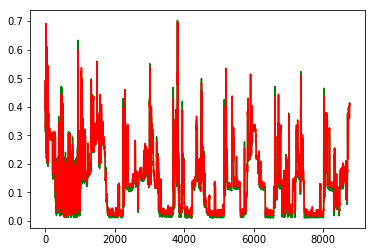

In [39]:
# plot train actual and predicted
plt.plot(train_y, 'g')
plt.plot(Y_train_pred, 'r')
plt.show()

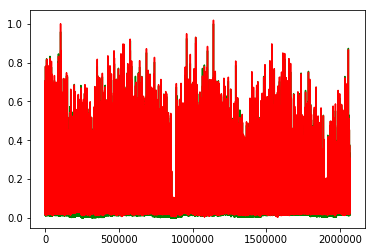

In [40]:
# plot test actual and predicted
plt.plot(test_y, 'g')
plt.plot(Y_test_pred, 'r')
plt.show()

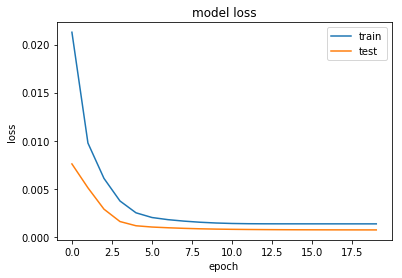

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.298
